#**Load MNIST Image Data and Fit Model**

In [1]:
# SHAP can break with the latest version of tensorflow - this makes TF behave like version 1.0.
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 10s 10ms/step - loss: 0.2492 - accuracy: 0.9241 - val_loss: 0.0537 - val_accuracy: 0.9825
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0888 - accuracy: 0.9738 - val_loss: 0.0417 - val_accuracy: 0.9856
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0335 - val_accuracy: 0.9895
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0312 - val_accuracy: 0.9891
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0332 - val_accuracy: 0.9898
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 7/

#**Load SHAP and Explain Predictions**

In [13]:
!pip install shap
import shap
import numpy as np

# We will randomly sample 100 images from the training data.
# This image set will be used as the basis for constructing counter-examples (permutations/combinations) for each feature-value, which marginal contributions will be averaged over for each feature.
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on two images
# Note that Deep Explainer is specific to Neural Nets, and works better at capturing them than
# GradientExplainer, which is more general and can be used with any ML model.
e = shap.DeepExplainer(model, background)

shap_values = e.shap_values(x_test[0:2])

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Here, we produce plots of the SHAP values associated with pixels for five text images, for each of the different outcome class labels in the softmax.

313/313 [==============================] - 0s 1ms/step
7
2


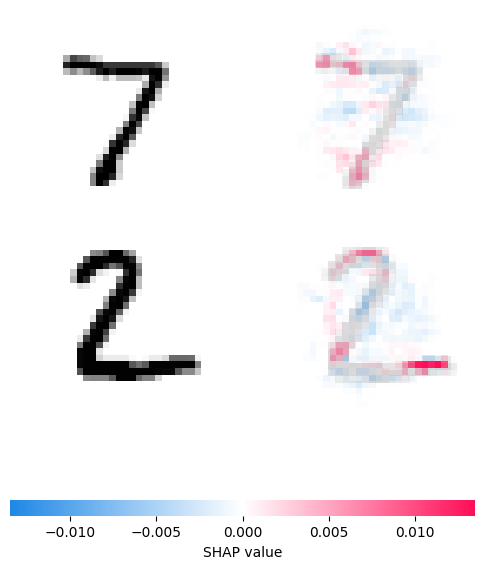

In [14]:
predictions = model.predict(x_test)
print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))

shap.image_plot(shap_values, -x_test[0:2])